# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [81]:
import pandas as pd

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [82]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx",
                  na_values=['Unknown', 'UNKNOWN'])
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [45]:
df.shape

(81937, 15)

In [46]:
df.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [80]:
print (f'Each row is a dog registered for a license by New York City. Spayed or Neuted refers to whether a dog is spayed or not. Animal Gender is whether a dog is a female or a male.')

Each row is a dog registered for a license by New York City. Spayed or Neuted refers to whether a dog is spayed or not. Animal Gender is whether a dog is a female or a male.


# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

1. what is the longest time for a dog to be registered for a license since his/her birth?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [48]:
df['Primary Breed'].value_counts().head(10)

Primary Breed
Yorkshire Terrier                       5133
Shih Tzu                                4727
Chihuahua                               3924
Maltese                                 2965
Labrador Retriever                      2872
American Pit Bull Terrier/Pit Bull      2153
American Pit Bull Mix / Pit Bull Mix    2029
Labrador Retriever Crossbreed           1864
Beagle                                  1438
Pomeranian                              1422
Name: count, dtype: int64

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

<Axes: ylabel='Primary Breed'>

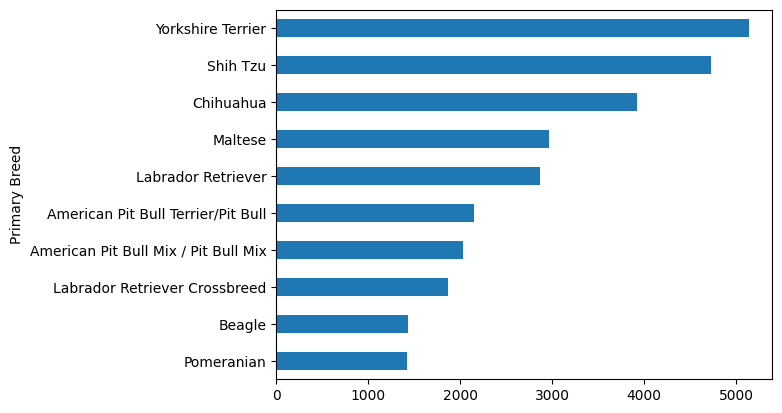

In [49]:
df['Primary Breed'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh')

## What are the most popular dog names?

In [50]:
df['Animal Name'].value_counts(dropna=True)

Animal Name
Bella                                                         527
Max                                                           515
Charlie                                                       403
Lola                                                          387
Rocky                                                         354
Lucy                                                          338
unknown                                                       337
Coco                                                          308
Buddy                                                         300
Lucky                                                         291
Daisy                                                         279
Bailey                                                        259
Dog Name Not Provided                                         243
no name                                                       240
Molly                                                         22

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [90]:
#df['Max'] = df['Animal Name'].str.replace('Max', 'Max', regex=True)
df[df['Max'].str.contains('Max', na=False)]['Max'].value_counts().head(30)

Max
Max                 515
Maximus              63
Maxwell              30
Maxine               20
Maxx                 16
Maxie                15
Max                  15
Maxi                 13
Maximilian            9
Max                   8
Maximillian           7
Maximus               7
Maximillion           5
Maximo                5
Max                   5
Maxamillion           4
Maxy                  4
Max                   4
Maxwell               4
Max                   3
Max                   2
Maximino              2
Max                   2
Max Holmes            1
Maxamis               1
Max Millian           1
Max Yam               1
Maximus Montalvo      1
Maxie Carbonell       1
Maxwell Mitchell      1
Name: count, dtype: int64

In [88]:
df[df['Animal Name'].str.contains('Maxwell', na=False)]['Animal Name'].value_counts().head(30)
df[df['Animal Name'].str.contains('Maxwell', na=False)]['Animal Name'].value_counts().sum()


np.int64(51)

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [53]:
df['Guard or Trained'].value_counts(dropna=False, ascending=True, normalize=True)

Guard or Trained
Yes    0.000622
NaN    0.394950
No     0.604428
Name: proportion, dtype: float64

## What are the actual numbers?

In [54]:
df['Guard or Trained'].value_counts(dropna=False, ascending=True)

Guard or Trained
Yes       51
NaN    32361
No     49525
Name: count, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [55]:
df['Guard or Trained'].value_counts(dropna=False, ascending=True)

Guard or Trained
Yes       51
NaN    32361
No     49525
Name: count, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

**We're maing a big assumption** here that if they aren't listed as guard dogs, they probably aren't guard dogs.

Look up `.fillna`. Check your result with another `.value_counts()`

In [56]:
df['Guard or Trained'] = df['Guard or Trained'].fillna('No')
df['Guard or Trained'].value_counts(ascending=True)

Guard or Trained
Yes       51
No     81886
Name: count, dtype: int64

## What are the top dog breeds for guard dogs? 

In [57]:
guard = df[df['Guard or Trained'] == 'Yes']
guard['Primary Breed'].value_counts()

Primary Breed
German Shepherd Dog                     4
Chihuahua                               3
Labrador Retriever                      3
Rottweiler                              3
American Pit Bull Mix / Pit Bull Mix    3
Shih Tzu                                2
Staffordshire Bull Terrier              2
Poodle, Standard                        1
Beagle Crossbreed                       1
Weimaraner                              1
Maltese                                 1
Boxer                                   1
Poodle, Miniature                       1
Welsh Corgi, Pembroke                   1
Border Terrier                          1
Poodle, Toy                             1
Siberian Husky                          1
Pekingese                               1
Miniature Pinscher                      1
Dachshund, Long Haired                  1
Shetland Sheepdog                       1
Yorkshire Terrier                       1
Schnauzer, Miniature                    1
Golden Retriever    

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with `df['Animal Birth'].dt.year` or `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [58]:
df['Year'] = df['Animal Birth'].dt.year
df['Year'].value_counts(dropna=False)

Year
2015    9665
2014    7749
2013    7331
2012    6889
2010    6624
2011    6562
2009    6223
2008    5720
2007    5363
2006    4572
2005    3996
2004    3275
2003    2690
2002    1881
2001    1292
2000     917
2016     608
1999     340
1998     137
1997      42
1996      21
1995      10
1994       7
1991       6
1992       3
1987       3
1988       2
1990       2
1993       2
1989       1
1984       1
1986       1
1985       1
1981       1
Name: count, dtype: int64

## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [59]:
current_yr = 2024
df['Age'] = current_yr - df['Year']
df.head(10)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Max,Year,Age
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,BLUE MACK,2007,17
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,Indie Zephir,2013,11
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,Bilal,2014,10
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,Buddy,2008,16
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,Ali,2014,10
5,10013,Queen,F,Akita Crossbreed,NaN,Charcoal,Red,NaN,2013-04-01,No,No,Yes,2014-09-12 16:14:48.487,2014-09-12,2017-09-12,Queen,2013,11
6,10035,Paige Sable Orta,F,American Pit Bull Mix / Pit Bull Mix,NaN,White,Gray,NaN,2014-07-01,No,No,No,2014-09-12 16:22:54.113,2014-09-12,2017-09-12,Paige Sable Orta,2014,10
7,10465,Yogi,M,Boxer,NaN,TAN,BLACK,NaN,2010-09-01,Yes,No,Yes,2014-09-12 16:47:35.317,2014-09-12,2017-10-02,Yogi,2010,14
8,10013,Chewbacca,F,Labrador Retriever Crossbreed,NaN,RED,NaN,NaN,2012-06-01,Yes,No,Yes,2014-09-12 17:42:56.647,2014-09-12,2019-10-01,Chewbacca,2012,12
9,10013,IAN,M,NaN,GREYHOUND TER X,WHITE,BLACK,NaN,2006-01-01,Yes,No,Yes,2014-09-12 19:09:19.020,2014-09-12,2019-10-30,IAN,2006,18


# Joining data together

In [60]:
zipcode_df = pd.read_csv("zipcodes-neighborhoods.csv")
zipcode_df.head()

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx


## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [61]:
merged = zipcode_df.merge(df, left_on='zip', right_on='Owner Zip Code')
merged.head()

,neighborhood,zip,borough,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Max,Year,Age
0,Central Bronx,10453,Bronx,10453,T-Bone,M,Bulldog,NaN,White,Tan,Apricot,2010-04-01,Yes,No,Yes,2014-11-16 16:48:08.080,2014-11-16,2016-11-16,T-Bone,2010,14
1,Central Bronx,10453,Bronx,10453,Cici,F,American Pit Bull Mix / Pit Bull Mix,NaN,BROWN,RUST,BLACK,2008-11-01,Yes,No,No,2015-02-06 10:35:12.917,2015-02-06,2017-04-28,Cici,2008,16
2,Central Bronx,10453,Bronx,10453,Blue,M,Basset Hound,NaN,Brown,Tan,Cream,2005-02-01,Yes,No,No,2015-02-10 16:43:24.847,2015-02-10,2017-02-10,Blue,2005,19
3,Central Bronx,10453,Bronx,10453,Boi,M,Yorkshire Terrier,NaN,Black,Gray,Tan,2011-02-01,Yes,No,Yes,2015-02-10 16:43:24.847,2015-02-10,2017-02-10,Boi,2011,13
4,Central Bronx,10453,Bronx,10453,MARSHMELLO,F,Samoyed,NaN,WHITE,NaN,NaN,2004-01-01,Yes,No,Yes,2015-03-27 14:47:53.483,2015-03-27,2017-03-30,MARSHMELLO,2004,20


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [62]:
merged[merged['borough'] == 'Bronx']['Animal Name'].value_counts()

Animal Name
Rocky                                                         60
Max                                                           56
Bella                                                         54
Lucky                                                         51
Princess                                                      43
Coco                                                          38
Lola                                                          33
Charlie                                                       28
Buddy                                                         28
Gizmo                                                         27
Oreo                                                          26
Prince                                                        25
Luna                                                          24
Mia                                                           24
Toby                                                          22
Daisy        

In [63]:
merged[merged['borough'] == 'Brooklyn']['Animal Name'].value_counts()

Animal Name
unknown                                   234
Max                                       113
Bella                                     112
Charlie                                    96
Lola                                       88
Dog Name Not Provided                      84
Rocky                                      80
Lucy                                       80
no name                                    74
No Name                                    69
Lucky                                      68
Buddy                                      65
Daisy                                      62
Chloe                                      61
Princess                                   60
Coco                                       58
Penny                                      57
Luna                                       56
Teddy                                      53
Bailey                                     50
Toby                                       47
Maggie                

In [64]:
merged[merged['neighborhood'] == 'Upper East Side']['Animal Name'].value_counts()

Animal Name
Lucy                                                 40
Bella                                                31
Charlie                                              29
Coco                                                 29
NO NAME                                              26
Lola                                                 25
Dog Name Not Provided                                22
Bailey                                               21
Molly                                                20
Buddy                                                19
Oliver                                               19
Chloe                                                18
Daisy                                                18
Penny                                                18
Sammy                                                17
Lulu                                                 16
Max                                                  16
Luna                                

## What is the most common dog breed in each of the neighborhoods of NYC?

In [65]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [66]:
merged.groupby('neighborhood')['Primary Breed'].value_counts()

neighborhood                   Primary Breed                       
Borough Park                   Yorkshire Terrier                       115
                               Shih Tzu                                100
                               Chihuahua                                86
                               Maltese                                  83
                               Labrador Retriever                       60
                               Labrador Retriever Crossbreed            56
                               German Shepherd Crossbreed               42
                               Beagle                                   39
                               German Shepherd Dog                      36
                               Jack Russell Terrier                     36
                               Pomeranian                               36
                               American Pit Bull Mix / Pit Bull Mix     34
                               A

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

Be conscious of case-sensitivity! `WHITE` and `white` aren't the same, so you might need to standardize first.

Using `.isin` is going to be very helpful.

In [77]:
merged['Animal Dominant Color'] = merged['Animal Dominant Color'].str.upper()
merged['Animal Secondary Color'] = merged['Animal Secondary Color'].str.upper()
merged['Animal Third Color'] = merged['Animal Third Color'].str.upper()

merged['monochrome'] = (merged['Animal Dominant Color'].isin(['BLACK', 'WHITE', 'GREY']) & ((merged['Animal Dominant Color'] == merged['Animal Secondary Color']) | merged['Animal Secondary Color'].isna()) &
    ((merged['Animal Dominant Color'] == merged['Animal Third Color']) | merged['Animal Third Color'].isna())
)

merged['monochrome'].sum()                        

np.int64(10847)

## How many dogs are in each borough? Plot it in a graph.

<Axes: ylabel='borough'>

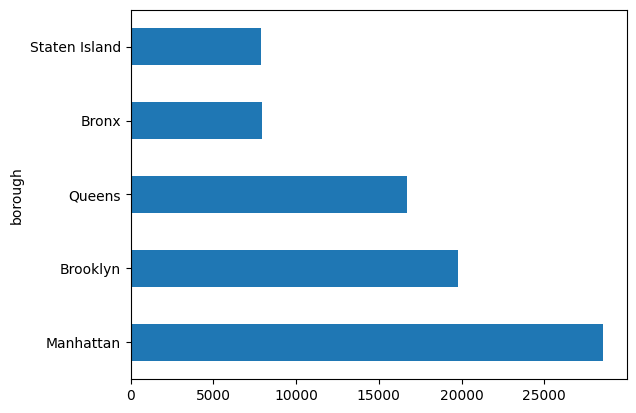

In [68]:
merged['borough'].value_counts().plot(y='borough',kind='barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [69]:
population_df = pd.read_csv("boro_population.csv")
economy = population_df.merge(merged, left_on = 'borough', right_on = 'borough')
economy.head()
num_dogs = economy['borough'].value_counts() 
num_dogs_borough = economy.groupby('borough').size()
pop_borough = economy.groupby('borough')['population'].first()
(num_dogs_per_borough / pop_borough).sort_values(ascending=False)

borough
Manhattan        0.017352
Staten Island    0.016626
Brooklyn         0.007504
Queens           0.007138
Bronx            0.005463
dtype: float64

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

<Axes: xlabel='borough,Primary Breed'>

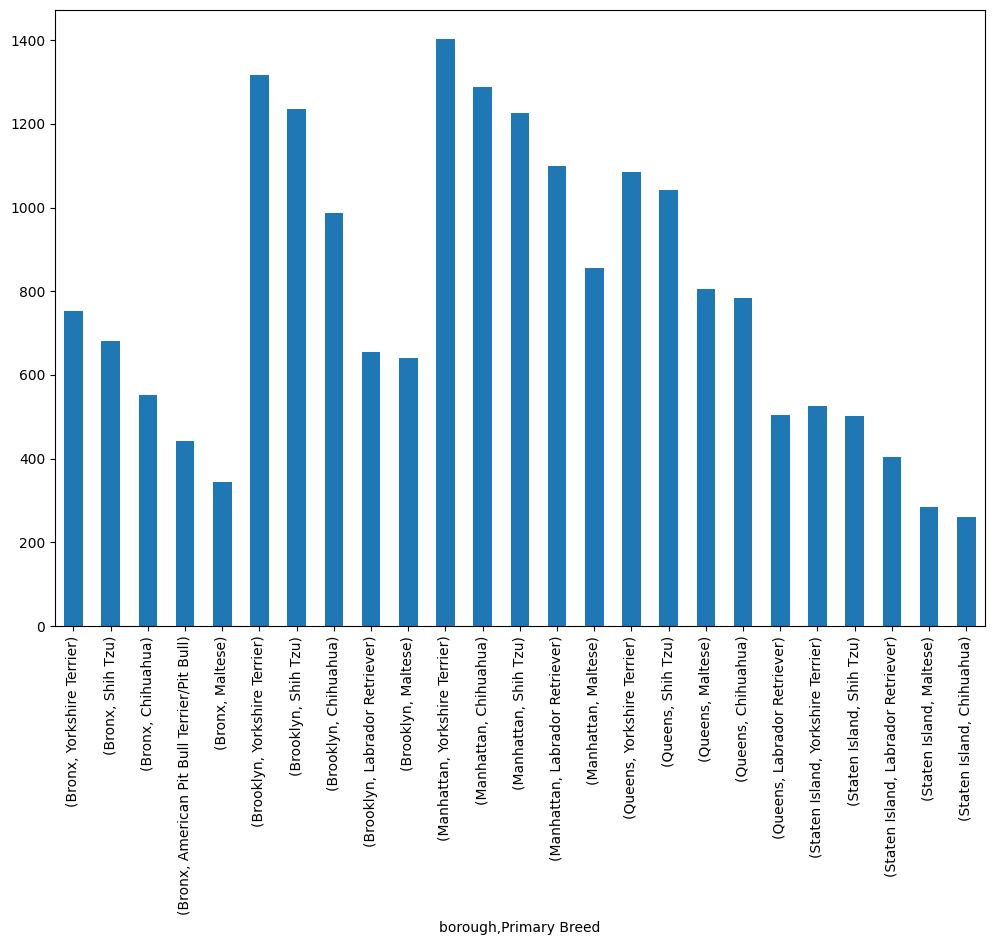

In [79]:
import matplotlib.pyplot as plt

breakdown = economy.groupby('borough')['Primary Breed'].value_counts()
top_five = breakdown.groupby('borough').head(5)
top_five
top_five.plot(x='borough', kind='bar', figsize=(12, 8))